## Stock Prediction using Deep Learning

In [8]:
# import libraries 
from pykalman import KalmanFilter
import numpy as np
import matplotlib.pyplot as plt   
import plotly.graph_objects as go
import yfinance as yf

In [9]:
def get_data(stock_name, indian='yes'):
    # indian = input("Is it an Indian stock (Yes/No) :").lower()

    stock_name = stock_name.upper()
    if indian == 'yes': 
        stock_name = stock_name + ".NS"
        stock_data = yf.download(stock_name, start='2010-01-01', end='2023-01-01')
        stock_data.reset_index(inplace=True)
        return stock_data 
    elif indian == 'no': 
        stock_data = yf.download(stock_name, start='2010-01-01', end='2023-01-01')
        stock_data.reset_index(inplace=True)
        return stock_data
    else:
        return "Incorrect input"
    
# stock_data = get_data('tcs','yes') 
# stock_data

In [10]:
tcs = get_data('tcs','yes')
t_mahindra = get_data('techm','yes')
wipro = get_data('wipro','yes')
# ltts = get_data('ltts','yes')
hdfc = get_data('hdfcbank','yes')
reliance = get_data('reliance','yes')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


### Raw Stock Price Visualisation

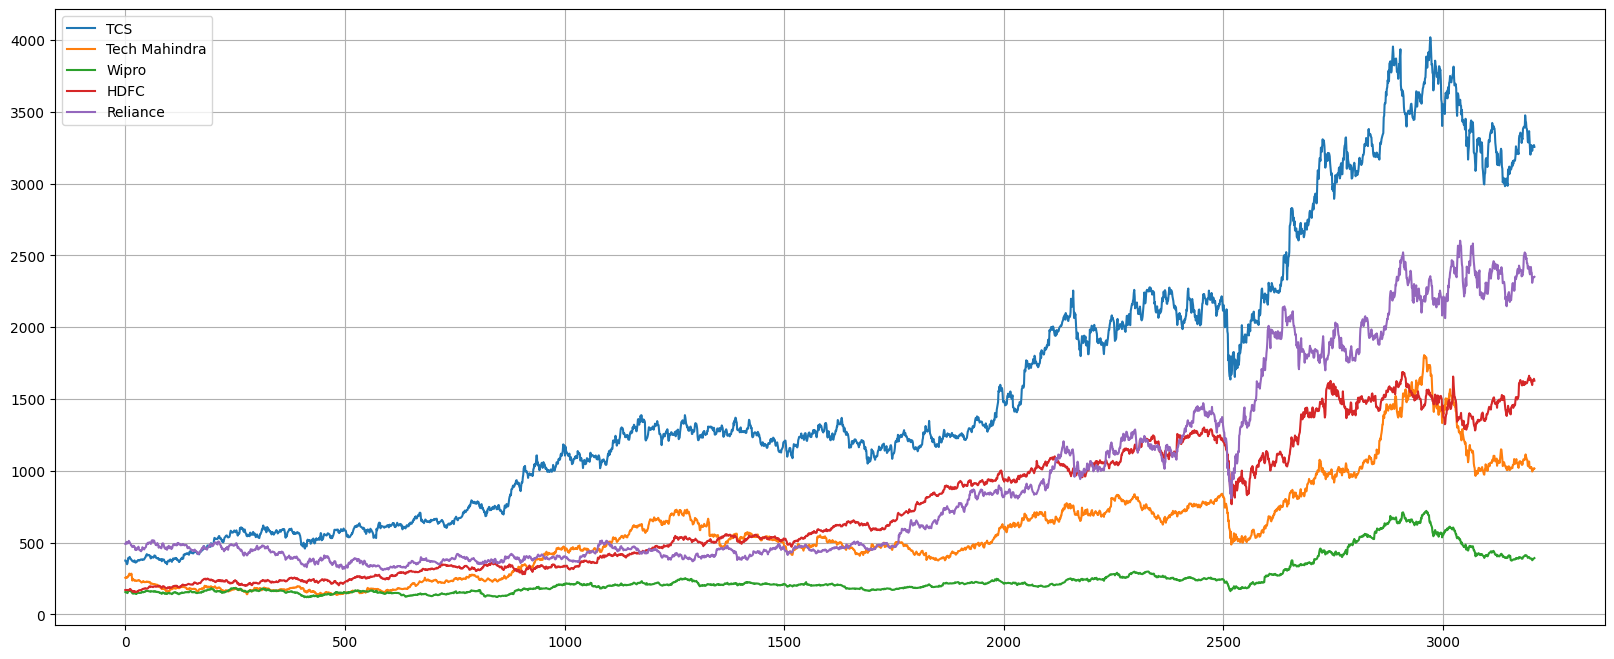

In [11]:
plt.figure(figsize=[20,8])
plt.plot(range(tcs.shape[0]), tcs['Close'], label='TCS')
plt.plot(range(t_mahindra.shape[0]), t_mahindra['Close'], label='Tech Mahindra')
plt.plot(range(wipro.shape[0]), wipro['Close'], label='Wipro')
# plt.plot(range(ltts.shape[0]), ltts['Close'], label='L&T Tech. Services')
plt.plot(range(hdfc.shape[0]), hdfc['Close'], label='HDFC')
plt.plot(range(reliance.shape[0]), reliance['Close'], label='Reliance'); 
plt.title("")
plt.grid()
plt.legend(); 


### Kalman Filtered Price Fluctuation

In [12]:
# def price_fluct(list_of_stocks):
    
#         kf = KalmanFilter(transition_matrices = [1], observation_matrices = [1], initial_state_mean = 0, 
#                          initial_state_covariance = 1, observation_covariance = 1,transition_covariance = 0.0001)
#         for company in list_of_stocks:
#             num = 0
#             mean, cov = kf.filter(company['Adj Close'].values)
#             mean, std = mean.squeeze(), np.std(cov.squeeze())
#             plt.subplot(len(list_of_stocks), 1, num+1)
#             plt.figure(figsize=(12,8))
#             plt.plot(company['Adj Close'].values - mean, 'red', lw=1.5)
#             # plt.xticks(range(0,company.shape[0],500),company['Date'].loc[::500],rotation=45)
#             # plt.title("Kalman filtered price fluctuation")
#             # plt.ylabel("Deviation from the mean ($)")
#             # plt.xlabel("Days")
#             num += 1

In [13]:
# To plot the Kalman filtered price fluctuation
def price_fluct(company):
    
        kf = KalmanFilter(transition_matrices = [1], observation_matrices = [1], initial_state_mean = 0, 
                         initial_state_covariance = 1, observation_covariance = 1,transition_covariance = 0.0001)
        mean, cov = kf.filter(company['Adj Close'].values)
        mean, std = mean.squeeze(), np.std(cov.squeeze())
        plt.figure(figsize=(14,4))
        plt.plot(company['Adj Close'].values - mean, 'red', lw=1.5)
        plt.xticks(range(0,company.shape[0],500),company['Date'].loc[::500],rotation=45)
        plt.title("Kalman filtered price fluctuation")
        plt.ylabel("Deviation from the mean ($)")
        plt.grid()
        plt.xlabel("Days")

# Interactive candlestick visualisation of the company's stock data 
def candlestick_viz(company):
    
    fig = go.Figure(data=[go.Candlestick(x=company['Date'],open=company['Open'],high=company['High'],
                low=company['Low'], close=company['Close'])])

    fig.show()

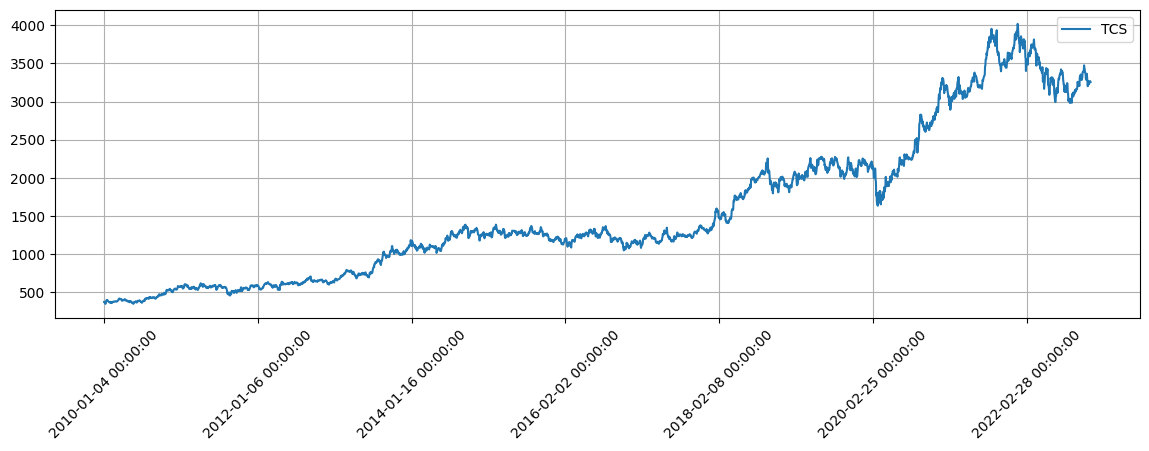

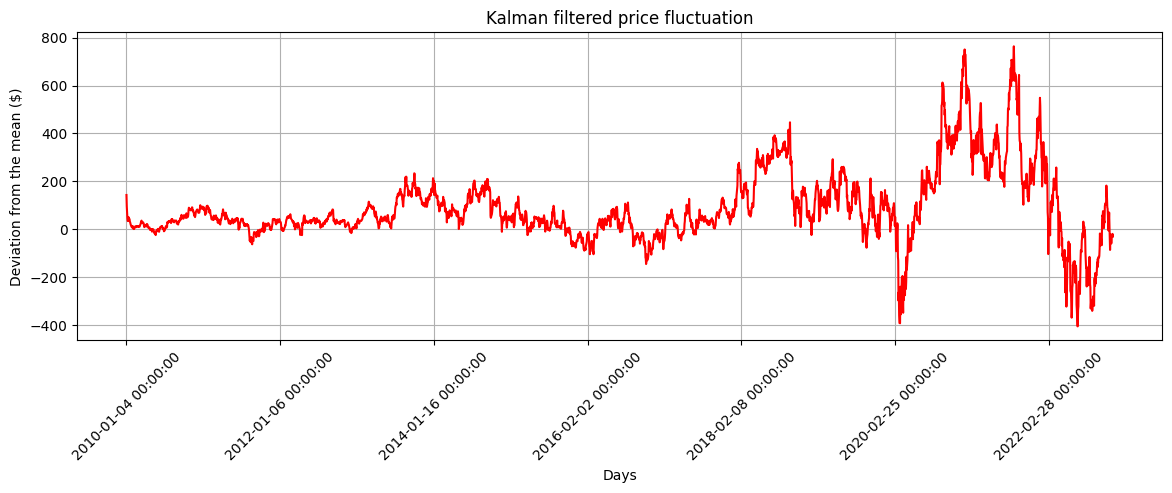

In [14]:
# Visualising raw stock price of TCS alongside the Kalman filtered price fluctuation 

plt.figure(figsize=[14,4])
# plt.subplot(2,1,1)
plt.plot(range(tcs.shape[0]), tcs['Close'], label='TCS')
plt.xticks(range(0,tcs.shape[0],500),tcs['Date'].loc[::500],rotation=45)
plt.legend()
plt.grid()
# plt.subplot(2,1,2)
price_fluct(tcs)

In [15]:
# Candlestick visualisation of TCS

candlestick_viz(tcs)

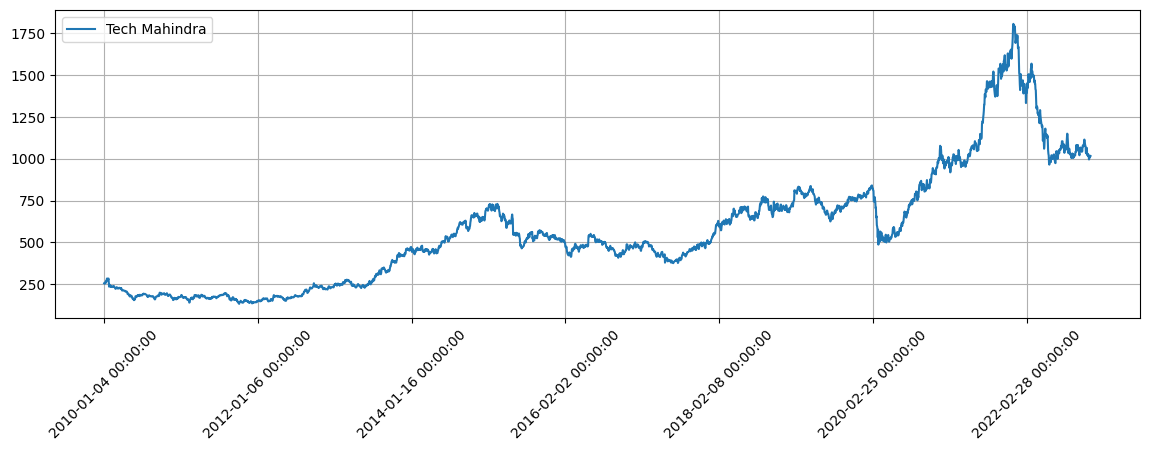

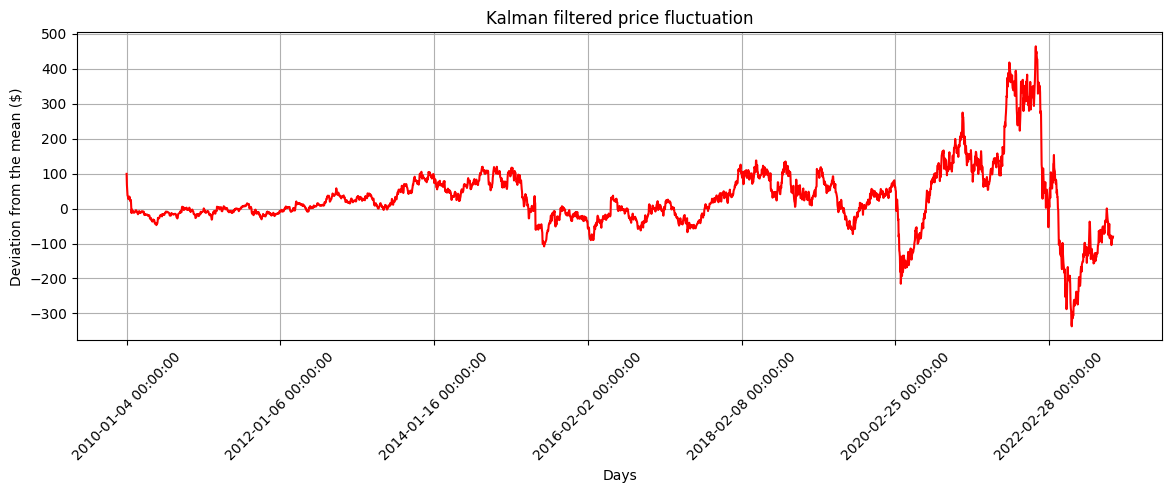

In [16]:
# Visualising raw stock price of Tech Mahindra alongside the Kalman filtered price fluctuation 

plt.figure(figsize=[14,4])

plt.plot(range(t_mahindra.shape[0]), t_mahindra['Close'], label='Tech Mahindra')
plt.xticks(range(0,t_mahindra.shape[0],500),t_mahindra['Date'].loc[::500],rotation=45)
plt.legend()
plt.grid()
price_fluct(t_mahindra)

In [17]:
# Candlestick visualisation for Tech Mahindra 
candlestick_viz(t_mahindra)

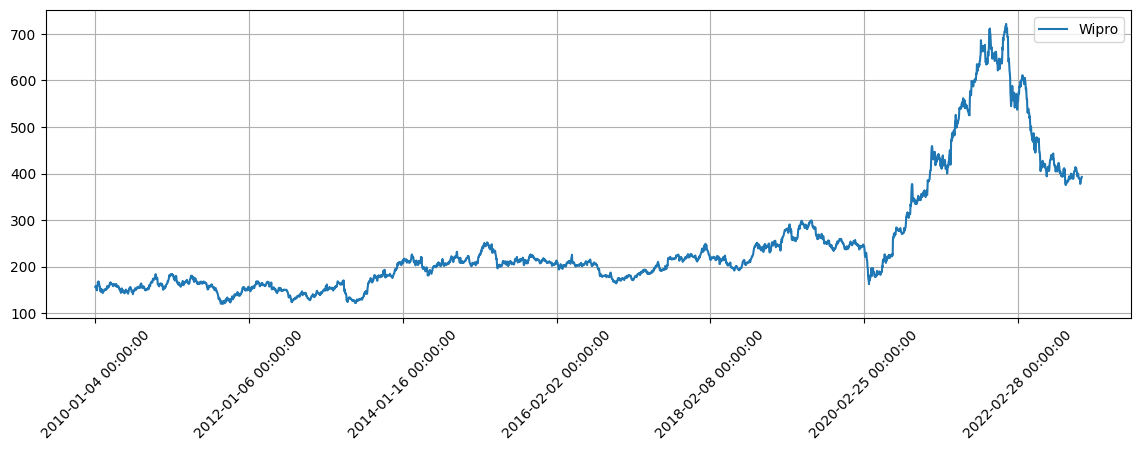

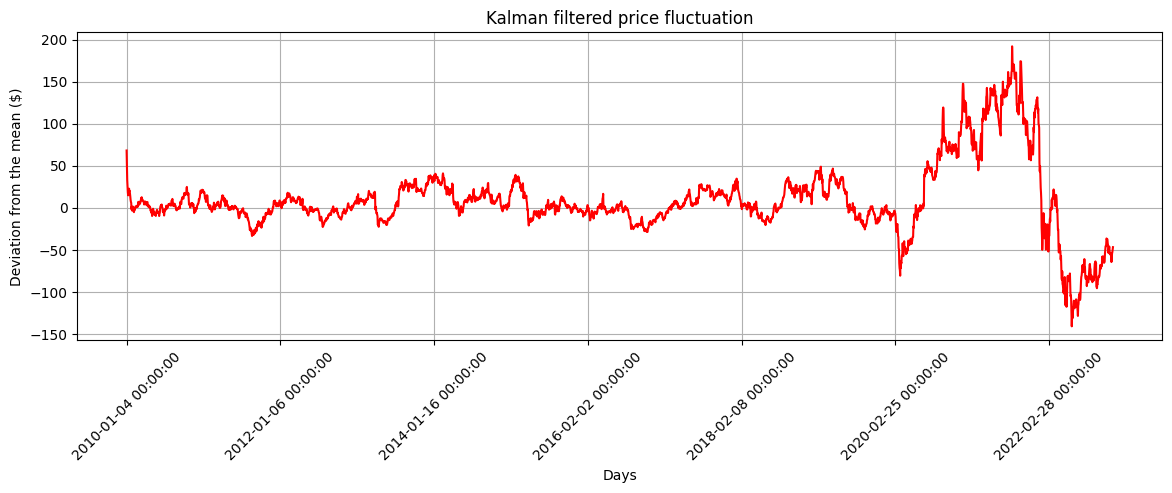

In [18]:
# Visualising raw stock price of Wipro alongside the Kalman filtered price fluctuation 

plt.figure(figsize=[14,4])

plt.plot(range(wipro.shape[0]), wipro['Close'], label='Wipro')
plt.xticks(range(0,wipro.shape[0],500),wipro['Date'].loc[::500],rotation=45)
plt.legend()
plt.grid()
price_fluct(wipro)

In [19]:
# Candlestick Visualisation of Wipro
candlestick_viz(wipro); 

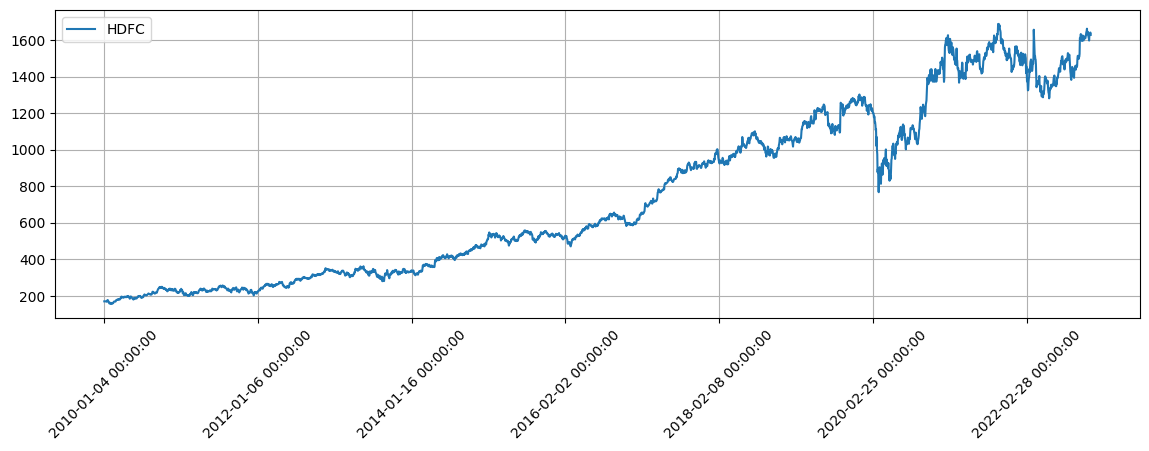

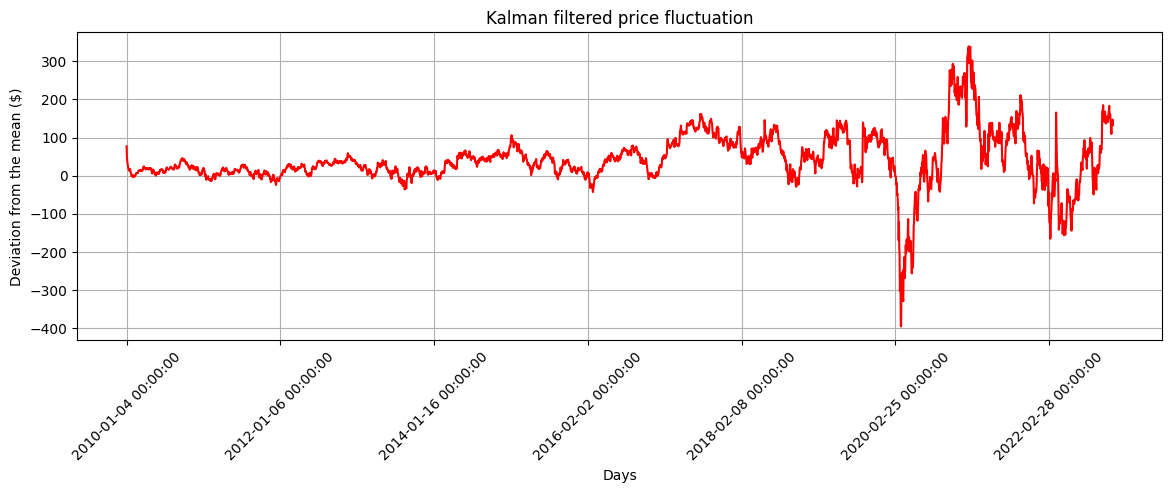

In [20]:
# Visualising raw stock price of HDFC alongside the Kalman filtered price fluctuation 

plt.figure(figsize=[14,4])

plt.plot(range(hdfc.shape[0]), hdfc['Close'], label='HDFC')
plt.xticks(range(0,hdfc.shape[0],500),hdfc['Date'].loc[::500],rotation=45)
plt.legend()
plt.grid()
price_fluct(hdfc)

In [21]:
# Candlestick visualisation for HDFC
candlestick_viz(hdfc)

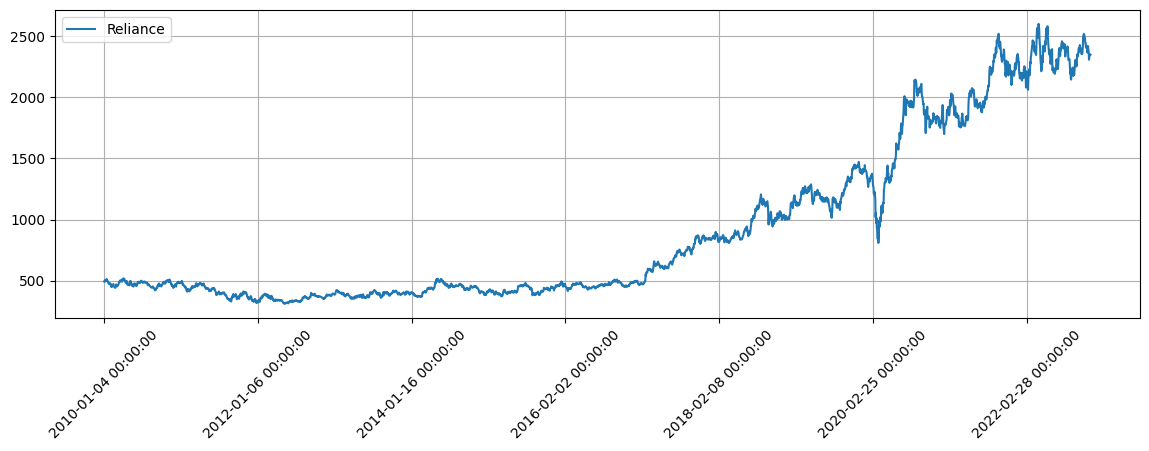

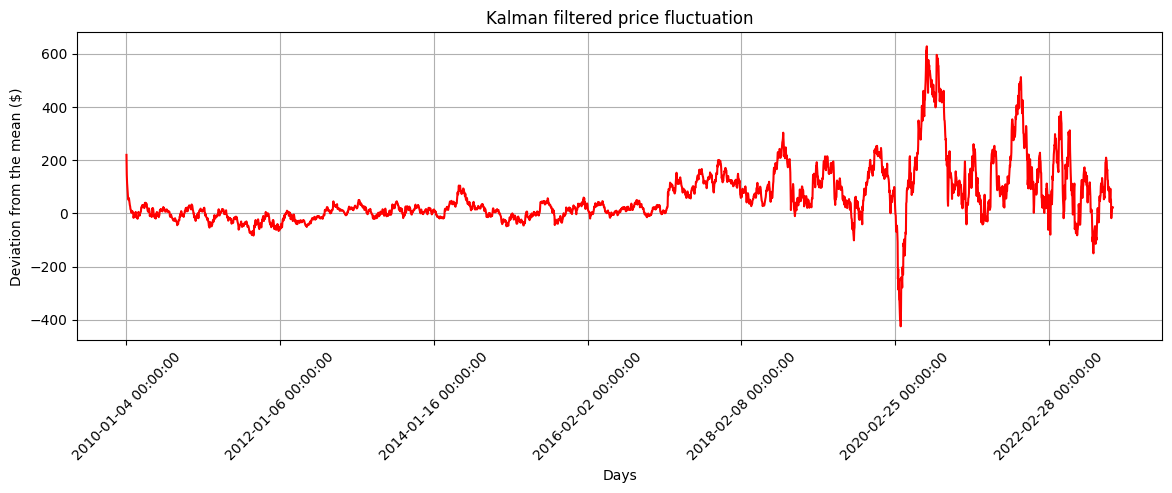

In [22]:
# Visualising raw stock price of Reliance alongside the Kalman filtered price fluctuation 

plt.figure(figsize=[14,4])

plt.plot(range(reliance.shape[0]), reliance['Close'], label='Reliance')
plt.xticks(range(0,reliance.shape[0],500),reliance['Date'].loc[::500],rotation=45)
plt.legend()
plt.grid()
price_fluct(reliance)

In [23]:
# Candlestick visualisation for Reliance 
candlestick_viz(reliance)

### Deep Learning Models

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,Dropout
from sklearn.metrics import accuracy_score
from tensorflow.keras import datasets, layers,models
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Activation,SimpleRNN
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from pykalman import KalmanFilter
import plotly.graph_objects as go
from datetime import datetime
tf.random.set_seed(7)


In [25]:
data = tcs.filter(['Open'])
dataset = data.values
training_data_len = int(np.ceil(len(dataset)*0.90))
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
train_data = scaled_data[:training_data_len]
X_train = []
y_train = []
print(len(train_data))
for i in range(60, len(train_data)): 
    X_train.append(train_data[i-60:i])
    y_train.append(train_data[i])
X_train, y_train = np.array(X_train), np.array(y_train) # converting from lists to array

test_data = scaled_data[training_data_len - 60 :]
X_test = []
y_test = dataset[training_data_len:]
for i in range(60, len(test_data)): 
    X_test.append(test_data[i-60:i])

X_test = np.array(X_test)

2889


In [124]:
print(X_train.shape)
print(X_test.shape)

(2829, 60, 1)
(320, 60, 1)


In [130]:
Xtrain = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))
print(Xtrain.shape)
print(X_train.shape)

(2829, 60, 1)
(2829, 60, 1)


In [131]:
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=32))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=1, epochs=1)
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

print(metrics.r2_score(y_test, predictions))
print(metrics.mean_squared_log_error(y_test, predictions))

/Users/ritwik/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2829/2829 ━━━━━━━━━━━━━━━━━━━━ 54s 19ms/step - loss: 0.0051
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
-0.7546129819367364
0.00835402648657777


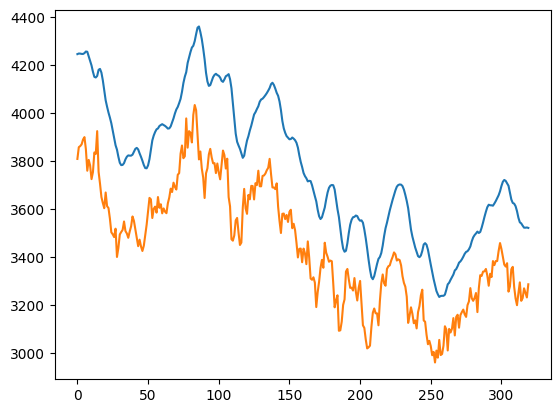

In [132]:
plt.plot(predictions)
plt.plot(y_test)

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0181
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 9.8940e-04
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 8.4050e-04
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 8.1308e-04
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 7.9627e-04
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 7.2596e-04
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 7.4625e-04
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 6.8399e-04
Epoch 9/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 6.0105e-04
Epoch 10/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 6.4956e-04
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
0.8782797734162648
0.0006430101169994996


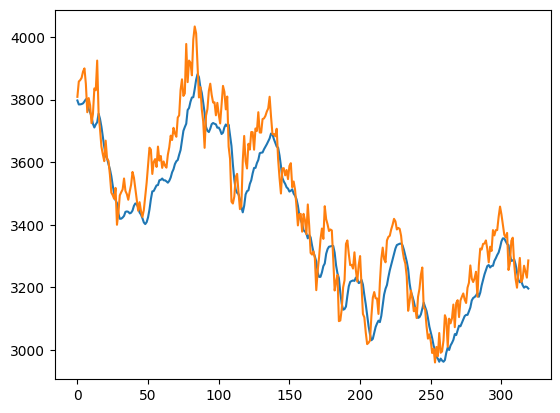

In [136]:
model = Sequential()
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=64))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=32, epochs=10)

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

print(metrics.r2_score(y_test, predictions))
print(metrics.mean_squared_log_error(y_test, predictions))

plt.plot(predictions)
plt.plot(y_test)

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 447us/step - loss: 0.0092 
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - loss: 0.0031
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - loss: 0.0024
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - loss: 0.0018
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - loss: 0.0015
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - loss: 0.0013
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - loss: 0.0011
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - loss: 9.5681e-04
Epoch 9/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - loss: 8.9260e-04
Epoch 10/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - loss: 8.1662e-04
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
0.8746628565404808
0.0006778475591663352


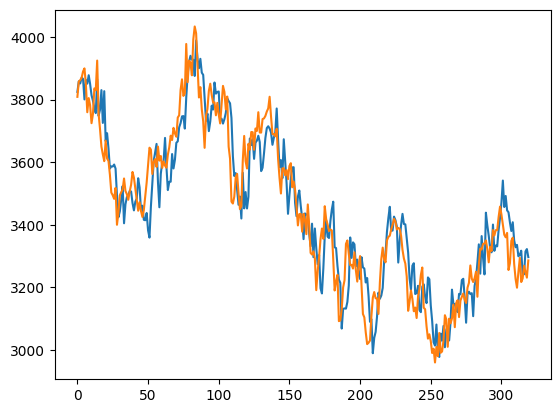

In [137]:
encoding_dim = 32 
input_dim = X_train.shape[1]
input_layer = Input(shape=(input_dim,))

encoder = Dense(encoding_dim, activation='tanh', activity_regularizer=regularizers.l1(1e-5))(input_layer)
encoder = Dense(int(encoding_dim/2), activation='relu')(encoder)

decoder = Dense(int(encoding_dim/2), activation='tanh')(encoder)
decoder = Dense(1, activation='relu')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_train, y_train, epochs=10, batch_size=32, shuffle=True)

predictions = autoencoder.predict(X_test)
predictions = scaler.inverse_transform(predictions)

print(metrics.r2_score(y_test, predictions))
print(metrics.mean_squared_log_error(y_test, predictions))

plt.plot(predictions)
plt.plot(y_test)

In [140]:
X_train.shape

(2829, 60, 1)

In [124]:
regr = MLPRegressor(hidden_layer_sizes=100, alpha=0.01, solver='lbfgs', shuffle=True)
# Solution to error
# https://stackoverflow.com/questions/34972142/sklearn-logistic-regression-valueerror-found-array-with-dim-3-estimator-expec
nsamples, nx, ny = X_train.shape 
temp = X_train.reshape((nsamples, nx*ny))

# temp_X_train = X_train.reshape(len(X_train[0]), 1)
regr.fit(temp, y_train)

nsamples, nx, ny = X_test.shape 
temp_test = X_test.reshape((nsamples, nx*ny))


predictions = regr.predict(temp_test)
predictions = predictions.reshape(len(predictions), 1)
predictions = scaler.inverse_transform(predictions)

print(metrics.r2_score(y_test, predictions))
print(metrics.mean_squared_log_error(y_test, predictions))

plt.plot(predictions)
plt.plot(y_test)

display(X_test)
display(temp_test)
temp_test.reshape(X_test.shape).shape
a = X_test.shape[0]-60
a
temp_test.reshape(a,X_test.shape[1], X_test.shape[2]).shape
X_forecast = model.predict(temp_test[-60:])
X_forecast = scaler.inverse_transform(X_forecast)
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
predictions_series = pd.Series(predictions[:, 0])
y_test_series = pd.Series(y_test[:, 0])
X_forecast = pd.Series(X_forecast[:, 0])

df1 = pd.concat([predictions_series, y_test_series], axis=1)
df2 = pd.concat([df1, X_forecast], axis=0, ignore_index=True)
df2 = df2.fillna(0)

display(df2[-65:])

plt.plot(df2[1][:320], color='green')
plt.plot(df2[0][:320], color='yellow', label='Actual'); 
plt.plot(df2[0][320:], color='orange', label='Predicted');
plt.legend()

/Users/ritwik/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



ValueError: cannot reshape array of size 19200 into shape (260,60,1)

In [147]:
X_train.shape

(2829, 60, 1)

Epoch 1/10


/Users/ritwik/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2829/2829 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0287
Epoch 2/10
2829/2829 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0018
Epoch 3/10
2829/2829 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 9.2904e-04
Epoch 4/10
2829/2829 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 5.0333e-04
Epoch 5/10
2829/2829 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 4.1743e-04
Epoch 6/10
2829/2829 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 3.2007e-04
Epoch 7/10
2829/2829 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 2.3502e-04
Epoch 8/10
2829/2829 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 1.5276e-04
Epoch 9/10
2829/2829 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 1.0440e-04
Epoch 10/10
2829/2829 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 8.9896e-05
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
0.9371522044619998
0.00032937118341916057


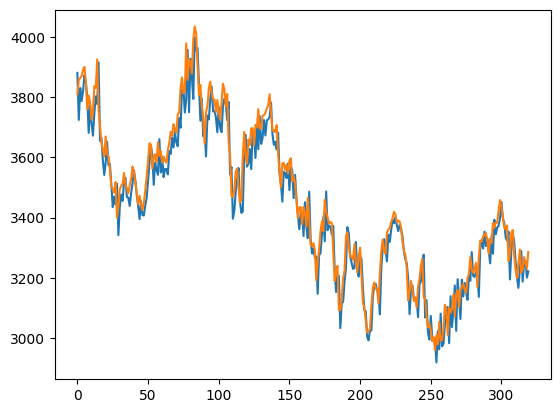

In [26]:
model = Sequential()
model.add(SimpleRNN(units=4, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=10, batch_size=1)

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)


print(metrics.r2_score(y_test, predictions))
print(metrics.mean_squared_log_error(y_test, predictions))

plt.plot(predictions)
plt.plot(y_test)

In [32]:
# X_test.shape
X_test[-60:].shape

(60, 60, 1)

In [34]:
# Making a prediction based on the last 60 days 
x_forecast = model.predict(X_test[-60:])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [40]:
x_forecast = scaler.inverse_transform(x_forecast)

array([[3044.4812],
       [3099.7622],
       [3103.2986],
       [2983.4536],
       [3139.2856],
       [3036.991 ],
       [3089.9436],
       [3174.8955],
       [3024.2712],
       [3195.6943],
       [3128.2563],
       [3063.708 ],
       [3193.832 ],
       [3138.433 ],
       [3183.3228],
       [3150.706 ],
       [3127.245 ],
       [3207.3757],
       [3190.6965],
       [3285.4875],
       [3207.1455],
       [3203.1245],
       [3219.8691],
       [3217.2   ],
       [3137.124 ],
       [3300.8103],
       [3320.6821],
       [3297.1768],
       [3353.4272],
       [3305.5063],
       [3332.4526],
       [3290.5393],
       [3248.3435],
       [3338.325 ],
       [3280.0466],
       [3392.9644],
       [3344.742 ],
       [3366.6255],
       [3373.084 ],
       [3399.2893],
       [3451.692 ],
       [3397.8184],
       [3381.8633],
       [3334.0647],
       [3324.1846],
       [3353.541 ],
       [3194.9946],
       [3288.1025],
       [3346.888 ],
       [3321.6243],


In [42]:
x_forecast.shape

(60, 1)

In [45]:
predictions.shape

(320, 1)

In [54]:
# plt.plot(predictions)
# plt.plot(y_test)
# plt.plot(x_forecast)
pred_series = pd.Series(predictions[:,0])
y_test_series = pd.Series(y_test[:,0])
x_forecast = pd.Series(x_forecast[:, 0])

In [80]:
df1 = pd.concat([pred_series, y_test_series], axis=1)
df2 = pd.concat([df1, x_forecast], axis=0, ignore_index=True)
df2 = df2.fillna(0)

In [81]:
df2

,0,1
0,3880.026611,3809.0
1,3723.945557,3858.0
2,3830.049072,3862.5
3,3786.517578,3870.0
4,3819.351074,3890.0
...,...,...
375,3187.556885,0.0
376,3247.958984,0.0
377,3256.349609,0.0
378,3201.054199,0.0


In [79]:
# df2[-61:]
df1.shape

(320, 2)

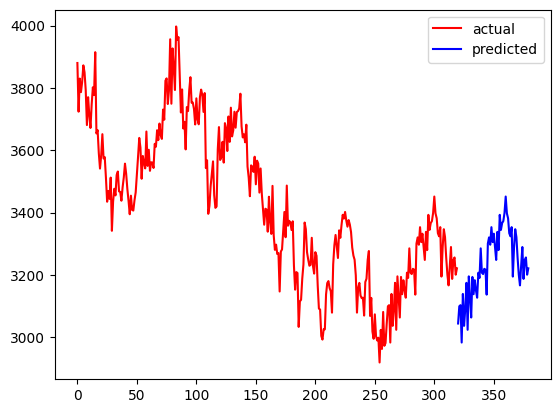

In [89]:
# df2[0].plot()
plt.plot(df2[0][:320], color='red', label='actual')
plt.plot(df2[0][320:], color='blue', label='predicted'); 
plt.legend(); 

In [7]:
X_test.shape

NameError: name 'X_test' is not defined

In [135]:
train_data.shape

(2889, 1)

In [118]:
print(X_train.shape)
print(y_train.shape)

(2829, 60, 1)
(2829, 1)


In [100]:
# print(len(train_data))
display(train_data[:10])
print(train_data.shape)
print(len(X_train))
print(len(y_train))

array([[0.00689852],
       [0.00692568],
       [0.00649791],
       [0.00427762],
       [0.00162957],
       [0.        ],
       [0.00380233],
       [0.0055677 ],
       [0.01282609],
       [0.01249338]])

(2889, 1)
2829
2829


In [113]:
len(X_train[0])

60

In [114]:
y_train[0]

array([0.01534513])

### LLM

In [5]:
# from transformers import TFGPT2LMHeadModel, TFGPT2Tokenizer
# from transformers import GPT2Tokenizer, GPT2LMHeadModel
# # tcs
# # prices = tcs['Close'].tolist()

In [4]:
# tokenizer = TFGPT2Tokenizer.from_pretrained("gpt2")
# model = TFGPT2LMHeadModel.from_pretrained("gpt2")

# tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
# model = GPT2LMHeadModel.from_pretrained("gpt2")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


,0,1
315,3187.556885,3228.350098
316,3247.958984,3269.199951
317,3256.349609,3249.800049
318,3201.054199,3231.100098
319,3221.430176,3286.050049
...,...,...
375,3187.556885,0.000000
376,3247.958984,0.000000
377,3256.349609,0.000000
378,3201.054199,0.000000


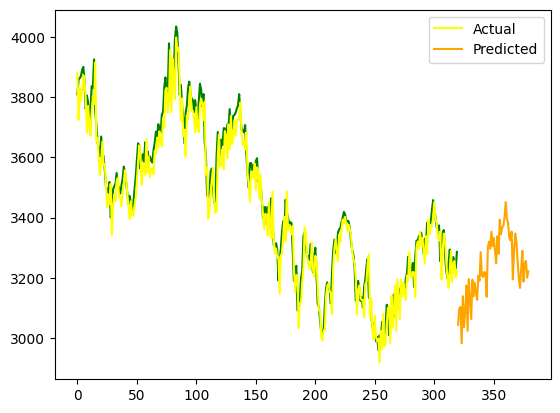

In [106]:
X_forecast = model.predict(X_test[-60:])
X_forecast = scaler.inverse_transform(X_forecast)
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
predictions_series = pd.Series(predictions[:, 0])
y_test_series = pd.Series(y_test[:, 0])
X_forecast = pd.Series(X_forecast[:, 0])

df1 = pd.concat([predictions_series, y_test_series], axis=1)
df2 = pd.concat([df1, X_forecast], axis=0, ignore_index=True)
df2 = df2.fillna(0)

display(df2[-65:])

plt.plot(df2[1][:320], color='green')
plt.plot(df2[0][:320], color='yellow', label='Actual'); 
plt.plot(df2[0][320:], color='orange', label='Predicted');
plt.legend()